In [77]:
'''
Parameters
----------
image : ndarray
    Input image data. Will be converted to float.
mode : str
    One of the following strings, selecting the type of noise to add:

    'gauss'     Gaussian-distributed additive noise.
    'poisson'   Poisson-distributed noise generated from the data.
    's&p'       Replaces random pixels with 0 or 1.
    'speckle'   Multiplicative noise using out = image + n*image,where
                n is uniform noise with specified mean & variance.
'''


import numpy as np
import os
import cv2

def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        #amount = 0.004
        amount = 0.024
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        #coords = [np.random.randint(0, i - 1, int(num_salt))
        #          for i in image.shape]
        coords = [np.random.randint(0, i, int(num_salt))
                  for i in image.shape]
        out[coords] = 1
        
        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        #coords = [np.random.randint(0, i - 1, int(num_pepper))
        #          for i in image.shape]
        coords = [np.random.randint(0, i, int(num_salt))
                  for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy


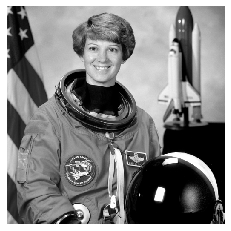

In [78]:
from skimage import data
#from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float
import matplotlib.pyplot as plt

astro = data.astronaut()
astro = cv2.cvtColor(astro,cv2.COLOR_RGB2GRAY)

plt.axis('off')
plt.imshow(astro ,cmap='gray')

(512, 512, 1)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:44: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:52: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


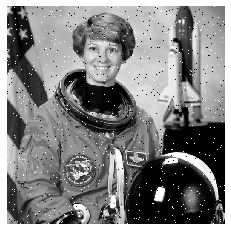

In [79]:
astro=astro/255.
h, r = astro.shape
astro2 = astro.reshape(h,r,1)
#np.newaxis(astro)
print(astro2.shape)


s_p = noisy('s&p',astro2)
s_p = s_p.reshape(h,r)
plt.axis('off')
plt.imshow(s_p ,cmap='gray')

In [80]:
np.random.randint(0, 1, int(100))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [81]:
s_p.dtype

dtype('float64')

In [82]:
import math
def psnr(src,dst):
    mse = np.mean((src-dst)**2)
    if mse == 0:
        return math.inf
    MAX=1
    return 20* math.log10(MAX/math.sqrt(mse))

In [83]:
psnr(astro,s_p)

21.00216718062843

In [57]:
psnr(astro,astro)

inf

In [54]:
20* math.log10(1/math.sqrt(0.000000000001))

120.0

In [84]:
data = cv2.datasets.female()
data.shape


TypeError: 'int' object is not callable